# Time Series Analysis

## Load datasets

In [ ]:
import pandas as pd
from IPython.display import display

# Load stock price data (sp500_stocks.csv)
stock_data = pd.read_csv('/home/sp500_stocks.csv')

# Load company metadata (sp500_companies.csv)
companies_data = pd.read_csv('/home/sp500_companies.csv')

# Display the dataframes in table format
print("Stocks data:")
display(stock_data.head(2))
print("Companies data:")
display(companies_data.head(2))


Stocks data:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0


Companies data:


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,228.20,3469575716864,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065476
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,435.27,3235379150848,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.061056


## Merge Datasets

In [ ]:
#recheck this filter apple data only
# Merge stock data and company data on the stock ticker symbol
merged_data = pd.merge(stock_data, companies_data, on='Symbol', how='left')

# Display the first few rows of the merged dataset
display(merged_data.head(2))

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0,NYQ,3M Company,...,134.77,74036436992,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001397
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0,NYQ,3M Company,...,134.77,74036436992,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001397


In [ ]:
#compute length of stocks data
len(stock_data)

1863112

In [ ]:
#compute length of companies data
len(companies_data)

503

In [ ]:
#compute length of both data's merged
len(merged_data)

1863112

## Filter merged data for Apple company

In [ ]:
# Filter the merged dataset for Apple stock data (ticker symbol: AAPL)
apple_data = merged_data[merged_data['Symbol'] == 'AAPL']

# Display the first few rows of Apple's data
display(apple_data.head(2))

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
144456,2010-01-04,AAPL,6.454507,7.643214,7.660714,7.585000,7.622500,493729600.0,NMS,Apple Inc.,...,228.2,3469575716864,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065476
144457,2010-01-05,AAPL,6.465663,7.656429,7.699643,7.616071,7.664286,601904800.0,NMS,Apple Inc.,...,228.2,3469575716864,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065476


In [ ]:
#compute the length of sampled apple company
len(apple_data)

3704

## Data Pre-processing

In [ ]:
# Check for missing values
print(apple_data.isnull().sum())

# Forward fill any missing values
apple_data.fillna(method='ffill', inplace=True)

# Drop any remaining NaN values (if any exist)
apple_data.dropna(inplace=True)

# Remove duplicates if any
apple_data.drop_duplicates(inplace=True)

# Ensure the data is clean
print(apple_data.info())

Date                   0
Symbol                 0
Adj Close              0
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
Exchange               0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3704 entries, 144456 to 148159
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 3704 non-null   object 
 1   Symbol               3704 non-null   object 
 2   Adj Close            3704 non-null   float64
 3   Close                3704 non-null   float64
 4 

<ipython-input-77-ee3b2f009bdb>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  apple_data.fillna(method='ffill', inplace=True)
<ipython-input-77-ee3b2f009bdb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data.fillna(method='ffill', inplace=True)
<ipython-input-77-ee3b2f009bdb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data.dropna(inplace=True)
<ipython-input-77-ee3b2f009bdb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

## Feature Engineering

In [ ]:
# Convert Date column to datetime format
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Set the Date column as the index for time series analysis
apple_data.set_index('Date', inplace=True)

# Feature Engineering: Create a 7-day and 30-day moving average
apple_data['7_day_avg'] = apple_data['Close'].rolling(window=7).mean()
apple_data['30_day_avg'] = apple_data['Close'].rolling(window=30).mean()

# Feature Engineering: Create lagged features (e.g., 1-day lag)
apple_data['lag_1'] = apple_data['Close'].shift(1)

# Display the first few rows with the new features
display(apple_data.head(2))

<ipython-input-78-512fb1bfa970>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
<ipython-input-78-512fb1bfa970>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['7_day_avg'] = apple_data['Close'].rolling(window=7).mean()
<ipython-input-78-512fb1bfa970>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,Longname,...,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,7_day_avg,30_day_avg,lag_1
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,AAPL,6.454507,7.643214,7.660714,7.585000,7.622500,493729600.0,NMS,Apple Inc.,Apple Inc.,...,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065476,NaN,NaN,NaN
2010-01-05,AAPL,6.465663,7.656429,7.699643,7.616071,7.664286,601904800.0,NMS,Apple Inc.,Apple Inc.,...,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065476,NaN,NaN,7.643214


## Apply time series model

### Arima Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(apple_data) * 0.8)
train, test = apple_data['Close'][:train_size], apple_data['Close'][train_size:]

# Run auto-ARIMA to find the best (p, d, q) values
auto_arima_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)

# Get the best parameters from auto_arima
print(auto_arima_model.summary())

# Get the best (p, d, q) parameters and fit the ARIMA model
p, d, q = auto_arima_model.order
model_arima = ARIMA(train, order=(p, d, q))  # ARIMA(p, d, q)
arima_fit = model_arima.fit()

# Forecast for the test set period
arima_forecast = arima_fit.forecast(steps=len(test))

# Convert forecast into a DataFrame for easier evaluation
arima_forecast_df = pd.DataFrame({'Date': test.index, 'Close': arima_forecast})
print(arima_forecast_df.head(2))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2963
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -4527.512
Date:                Sat, 21 Sep 2024   AIC                           9067.024
Time:                        16:35:31   BIC                           9102.983
Sample:                             0   HQIC                          9079.967
                               - 2963                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9212      0.008   -122.661      0.000      -0.936      -0.906
ar.L2         -0.7070      0.010    -72.048      0.000      -0.726      -0.688
ar.L3         -0.5537      0.009    -58.905      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


           Date       Close
2963 2021-10-11  143.105360
2964 2021-10-12  143.308681


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Prophet model

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet: 'ds' for date, 'y' for close price
prophet_data = apple_data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Create a dataframe for future predictions to cover the test period (same as ARIMA and LSTM)
# Use the same test set size for future forecasting as ARIMA and LSTM
future = model_prophet.make_future_dataframe(periods=len(test))

# Make the prediction
prophet_forecast = model_prophet.predict(future)

# To match the ARIMA and LSTM test period, slice the forecast data to match the test dates
prophet_forecast_test = prophet_forecast.set_index('ds').loc[test.index]

# Display the forecasted values for the same date range as ARIMA and LSTM
print(prophet_forecast_test[['yhat']].head())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrn66g7m/iyudbo1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrn66g7m/sfjwbms0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99649', 'data', 'file=/tmp/tmpfrn66g7m/iyudbo1_.json', 'init=/tmp/tmpfrn66g7m/sfjwbms0.json', 'output', 'file=/tmp/tmpfrn66g7m/prophet_model308ezzxw/prophet_model-20240921140431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                  yhat
Date                  
2021-10-11  143.455525
2021-10-12  143.431087
2021-10-13  143.509094
2021-10-14  143.529842
2021-10-15  143.579908


### LSTM model

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_data[['Close']])

# Prepare the data for LSTM (train-test split)
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create X and y for training (using 60 time steps for prediction)
X_train, y_train = [], []
for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data to 3D format for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile and fit the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, batch_size=1, epochs=1)

# Forecasting with the LSTM model
X_test = []
for i in range(60, len(test)):
    X_test.append(test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
lstm_forecast = model_lstm.predict(X_test)

# Inverse scale the LSTM forecast back to original scale
lstm_forecast = scaler.inverse_transform(lstm_forecast)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2903/2903 ━━━━━━━━━━━━━━━━━━━━ 97s 33ms/step - loss: 7.0034e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ARIMA Model Evaluation
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

# Prophet Model Evaluation
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_forecast['yhat'][:len(test)]))
print(f'Prophet RMSE: {prophet_rmse}')

# LSTM Model Evaluation
lstm_rmse = np.sqrt(mean_squared_error(test[60:], lstm_forecast))
print(f'LSTM RMSE: {lstm_rmse}')

ARIMA RMSE: 135.17319768648193
Prophet RMSE: 158.95243797844407
LSTM RMSE: 8.826025704862102


## Visualise the models

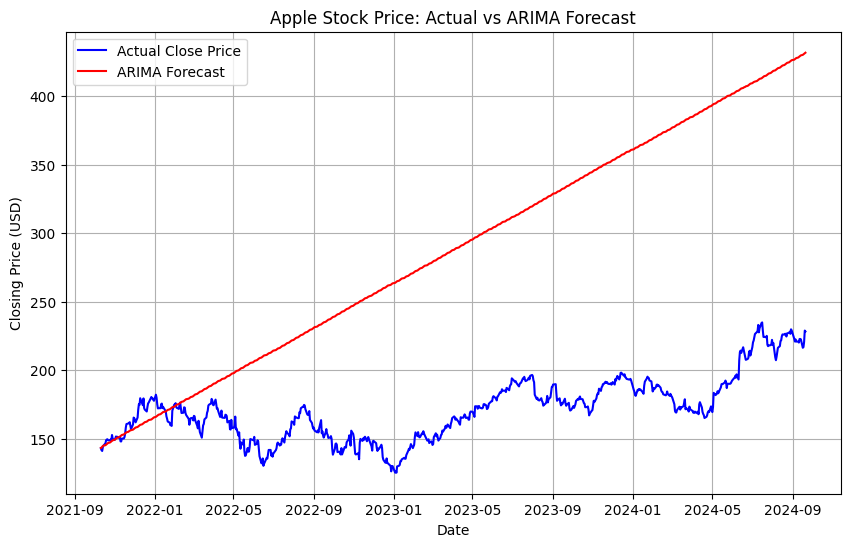

In [ ]:
# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Close Price', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('Apple Stock Price: Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

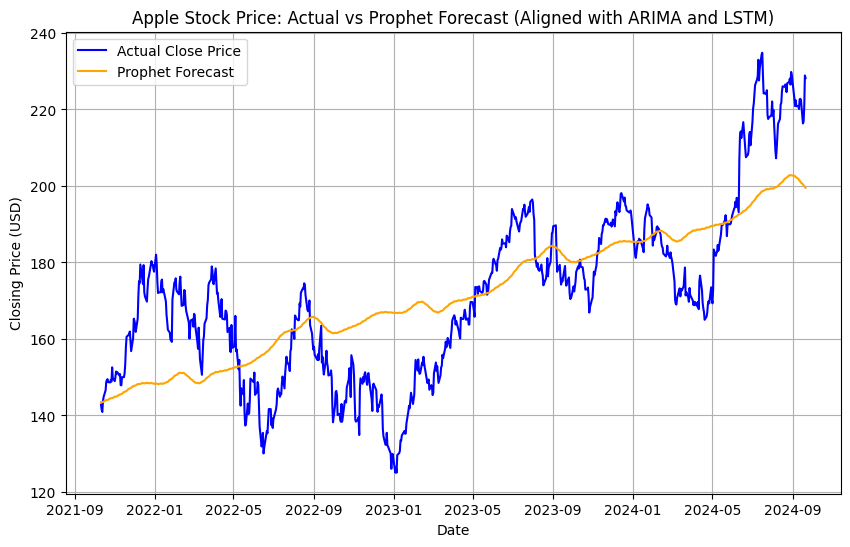

In [ ]:
# Plot actual vs Prophet forecasted values with the same test set range
plt.figure(figsize=(10, 6))

# Plot the actual closing prices (test set)
plt.plot(test.index, test, label='Actual Close Price', color='blue')

# Plot the Prophet forecasted prices
plt.plot(test.index, prophet_forecast_test['yhat'], label='Prophet Forecast', color='orange')

# Add titles and labels
plt.title('Apple Stock Price: Actual vs Prophet Forecast (Aligned with ARIMA and LSTM)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

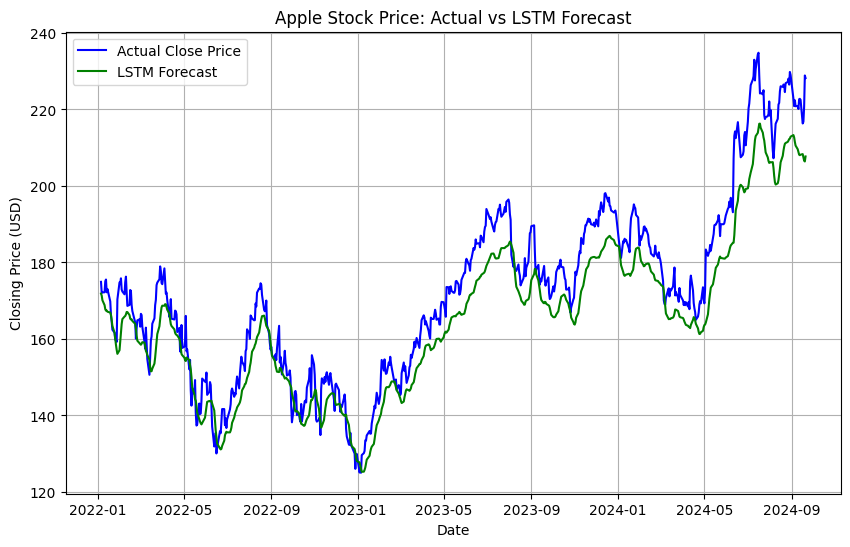

In [ ]:
# Plot the actual vs LSTM forecasted values
plt.figure(figsize=(10, 6))

# Plot the actual closing prices (test set)
plt.plot(test[60:].index, test[60:], label='Actual Close Price', color='blue')

# Plot the LSTM forecasted prices
plt.plot(test[60:].index, lstm_forecast, label='LSTM Forecast', color='green')

# Add titles and labels
plt.title('Apple Stock Price: Actual vs LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Visuzalise and create dashboard using Power BI

Created a dashboard using Power BI for the stock prices analysis